In [1]:

from PyCrypto.FetchPrices import *

### Get the current LTC price in USD

In [2]:
price('LTC')

{'USD': 272.14}

### Get the last 48 hours of historical prices from XRP to ETH

In [13]:
import datetime
df = minute_price_historical('XRP', 'ETH', limit = 60*48, aggregate = 1)
now = datetime.datetime.now()
df.head()

,close,high,low,open,time,volumefrom,volumeto,timestamp
0,0.002675,0.002675,0.002675,0.002675,1515235140,2428.70,6.51,2018-01-06 11:39:00
1,0.002675,0.002675,0.002675,0.002675,1515235200,11757.62,31.44,2018-01-06 11:40:00
2,0.002675,0.002675,0.002675,0.002675,1515235260,7168.00,19.16,2018-01-06 11:41:00
3,0.002680,0.002681,0.002677,0.002680,1515235320,6359.85,17.04,2018-01-06 11:42:00
4,0.002680,0.002680,0.002680,0.002680,1515235380,5731.21,15.36,2018-01-06 11:43:00


### Get the data from the last 15 minutes, compute smoothed price, derivative and smoothed derivative, and plot results. 

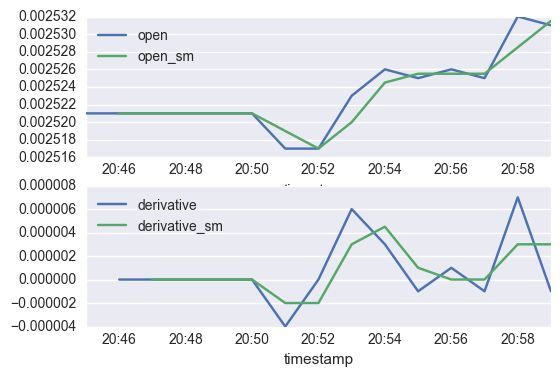

In [14]:

from scipy import stats
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

period_in_minutes = 15 # The number of minutes to extract from data
df_last_min = df[df['timestamp']> now - datetime.timedelta(minutes=period_in_minutes)].copy()
der = df_last_min['open'].diff()
df_last_min['derivative'] = der
df_last_min['open_sm'] = df_last_min['open'].rolling(window = 2, center = False).mean()
df_last_min['derivative_sm'] = df_last_min['derivative'].rolling(window = 2, center = False).mean()


ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)
df_last_min.plot(x = 'timestamp', y = 'open', logy=False, ax = ax1)
df_last_min.plot(x = 'timestamp', y = 'open_sm', logy=False, ax = ax1)
df_last_min.plot(x = 'timestamp', y = 'derivative', logy=False, ax = ax2)
df_last_min.plot(x = 'timestamp', y = 'derivative_sm', logy=False, ax = ax2)

### Perform t-test on smoothed derivative. If p-value is < 0.05, price change is significant in the specified period


In [15]:
x = df_last_min.derivative_sm.values
(t, p) = stats.ttest_1samp(x, 0, nan_policy='omit')
print('t-statistic = %6.3f p=value = %6.4f' %  (t, p))
trend = +1 if (t > 0) else -1 
is_significant = 1 if (p < 0.1) else 0
df_last_min['growing'] = pd.to_numeric(trend*is_significant)

t-statistic =  1.460 p=value = 0.1701
